Шаг 1: Загрузка данных. Загрузите датасет, содержащий числовые
признаки (например, Boston Housing, California Housing или другой
подходящий из UCI или Kaggle). Импортируйте необходимые библиотеки для
работы с данными, визуализацией и анализом. Загрузите данные в DataFrame
и просмотрите первые строки, чтобы ознакомиться с набором данных.


In [ ]:
import pandas as pd
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Импорт датасета
housing = fetch_california_housing()
housing_df = pd.DataFrame(housing.data, columns=housing.feature_names)
housing_df = housing_df.drop(columns=['Latitude', 'Longitude'])
print(housing_df.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467


Шаг 2: Исследование корреляций. Постройте корреляционную матрицу
для числовых признаков. Визуализируйте корреляционную матрицу с
помощью тепловой карты (heatmap). Определите пары признаков с
наибольшей и наименьшей корреляцией. Для этого найдите максимальные и
минимальные значения в корреляционной матрице, исключив диагональные
элементы.

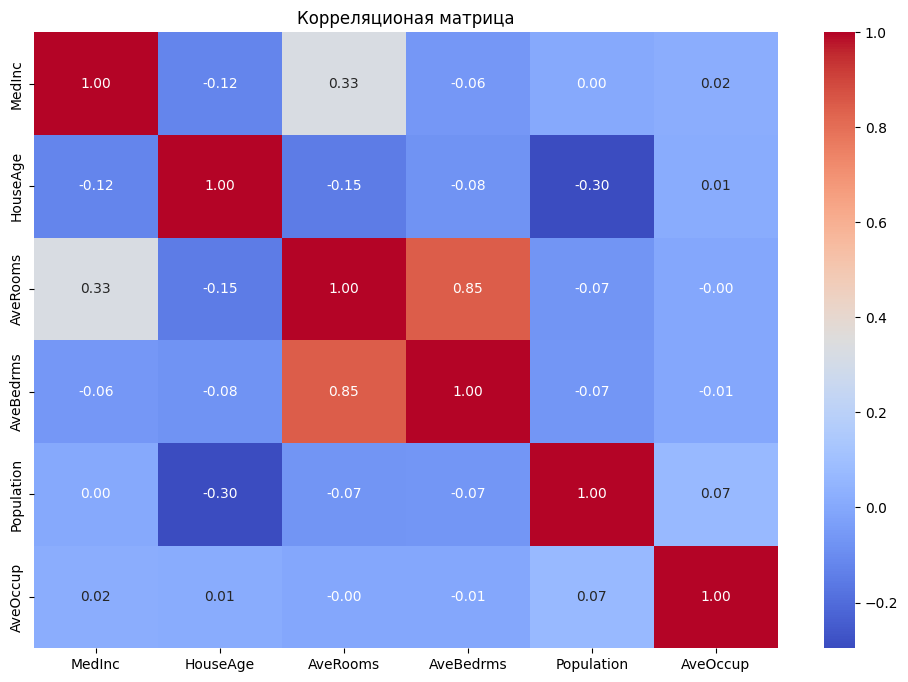

Максимальная корреляция: 0.8476213257130424 между ('AveRooms', 'AveBedrms')
Минимальная корреляция: 0.004834345627653136 между ('MedInc', 'Population')


In [ ]:
#Матрица корреляций
correlation_matrix = housing_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Корреляционая матрица")
plt.show()

mask = np.eye(correlation_matrix.shape[0], dtype=bool)
corr_values = correlation_matrix.mask(mask)

max_corr = corr_values.abs().max().max()
min_corr = corr_values.abs().min().min()

max_corr_pair = corr_values.abs().stack().idxmax()
min_corr_pair = corr_values.abs().stack().idxmin()

print(f"Максимальная корреляция: {max_corr} между {max_corr_pair}")
print(f"Минимальная корреляция: {min_corr} между {min_corr_pair}")

Шаг 3: Построение графиков зависимостей. Выберите два признака с
сильной корреляцией. Замените на реальные названия признаков из вашего
датасета. Постройте диаграмму рассеяния (scatter plot) и добавьте линию
регрессии.

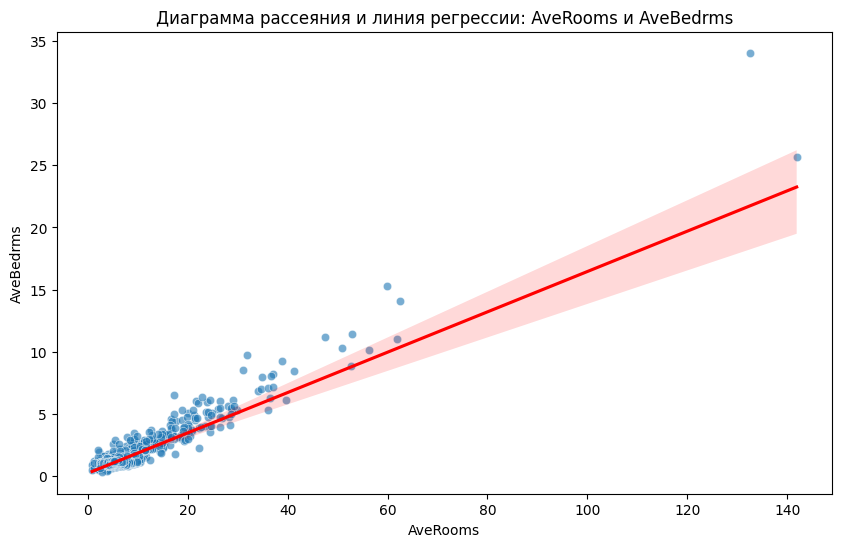

In [ ]:
#Регрессия
strong_corr_pair = max_corr_pair
AveRooms, AveBedrms = strong_corr_pair
plt.figure(figsize=(10, 6))
sns.scatterplot(x=housing_df[AveRooms], y=housing_df[AveBedrms], alpha=0.6)
sns.regplot(x=housing_df[AveRooms], y=housing_df[AveBedrms], scatter=False, color='red')
plt.title(f'Диаграмма рассеяния и линия регрессии: {AveRooms} и {AveBedrms}')
plt.xlabel(AveRooms)
plt.ylabel(AveBedrms)
plt.show()

Шаг 4: Подготовка данных. Нормализуйте данные, чтобы привести все
признаки к одному масштабу, используя стандартное масштабирование.
Разделите данные на обучающую и тестовую выборки в пропорции 80/20.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = housing_df
y = fetch_california_housing().target
#Нормализация
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

print(f"Размер обучающей выборки: {X_train.shape}")
print(f"Размер тестовой выборки: {X_test.shape}")

Размер обучающей выборки: (16512, 6)
Размер тестовой выборки: (4128, 6)


Шаг 5: Визуализация трендов. Используйте модель линейной регрессии
для предсказания и постройте график распределения ошибок между
предсказанными и реальными значениями. Постройте график ошибок
(выбросов), чтобы оценить точность модели.

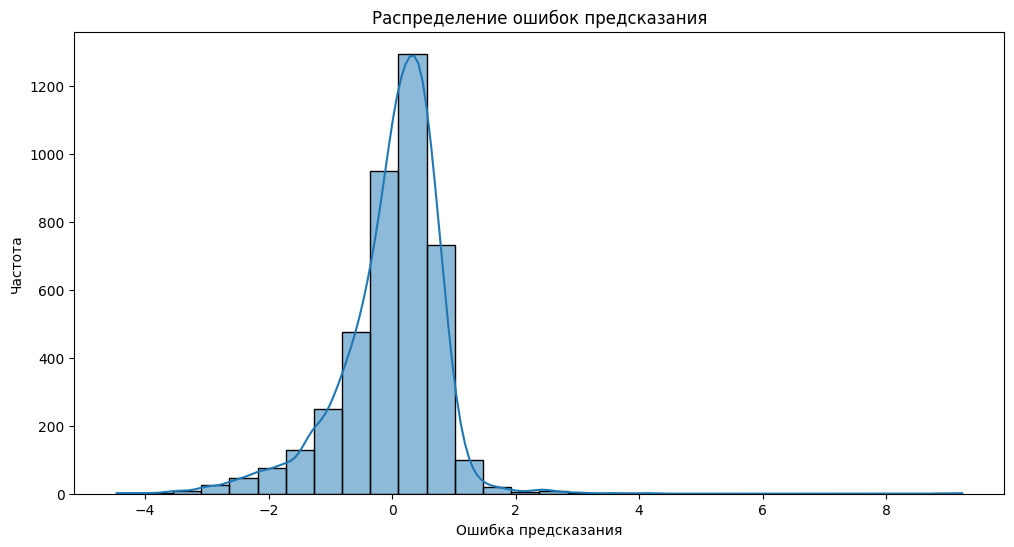

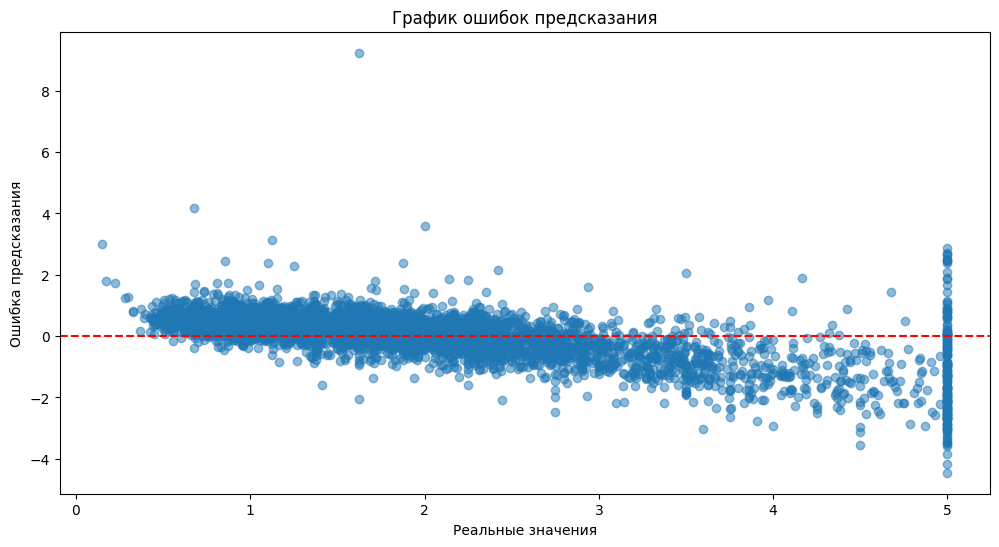

Среднеквадратическая ошибка (MSE): 0.64
Средняя абсолютная ошибка (MAE): 0.58


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
#Тренинг модели
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

errors = y_pred - y_test
plt.figure(figsize=(12, 6))
sns.histplot(errors, kde=True, bins=30)
plt.title('Распределение ошибок предсказания')
plt.xlabel('Ошибка предсказания')
plt.ylabel('Частота')
plt.show()

plt.figure(figsize=(12, 6))
plt.scatter(y_test, errors, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('График ошибок предсказания')
plt.xlabel('Реальные значения')
plt.ylabel('Ошибка предсказания')
plt.show()

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Среднеквадратическая ошибка (MSE): {mse:.2f}")
print(f"Средняя абсолютная ошибка (MAE): {mae:.2f}")


Шаг 6: Ответьте на вопросы. Как изменение одного признака влияет на
другой? Как влияет масштабирование данных на качество модели?

1. Чем больше корреляция стремится к 1, тем сильнее один признак влияет на другой, при стремлении к -1 означает также сильную корреляция только в обратной пропорции.
2. Масштабирование используется для алгоритмов, которые зависят от расстояний между точками (регрессия). Используется, когда признаки имеют разные масштабы (например, один признак измеряется в тысячах, а другой — в единицах).